In [1]:
from goods_s.objects import *

/home/tdshield/miniconda3/envs/research/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
snr_f277w = np.array(PROSP_SNR_F277W)
snr_f277w[snr_f277w == '-'] = '0.0'
snr_f277w = snr_f277w.astype(float)

snr_f356w = np.array(PROSP_SNR_F356W)
snr_f356w[snr_f356w == '-'] = '0.0'
snr_f356w = snr_f356w.astype(float)

snr_f444w = np.array(PROSP_SNR_F444W)
snr_f444w[snr_f444w == '-'] = '0.0'
snr_f444w = snr_f444w.astype(float)

In [3]:
np.max(PROSP_NPHOT)

16

/tmp/ipykernel_104458/526819943.py:5: RuntimeWarning: divide by zero encountered in divide
  burst = PROSP_SFR10 / PROSP_SFR100
/tmp/ipykernel_104458/526819943.py:5: RuntimeWarning: invalid value encountered in divide
  burst = PROSP_SFR10 / PROSP_SFR100


(0.0, 14.700000000000003)

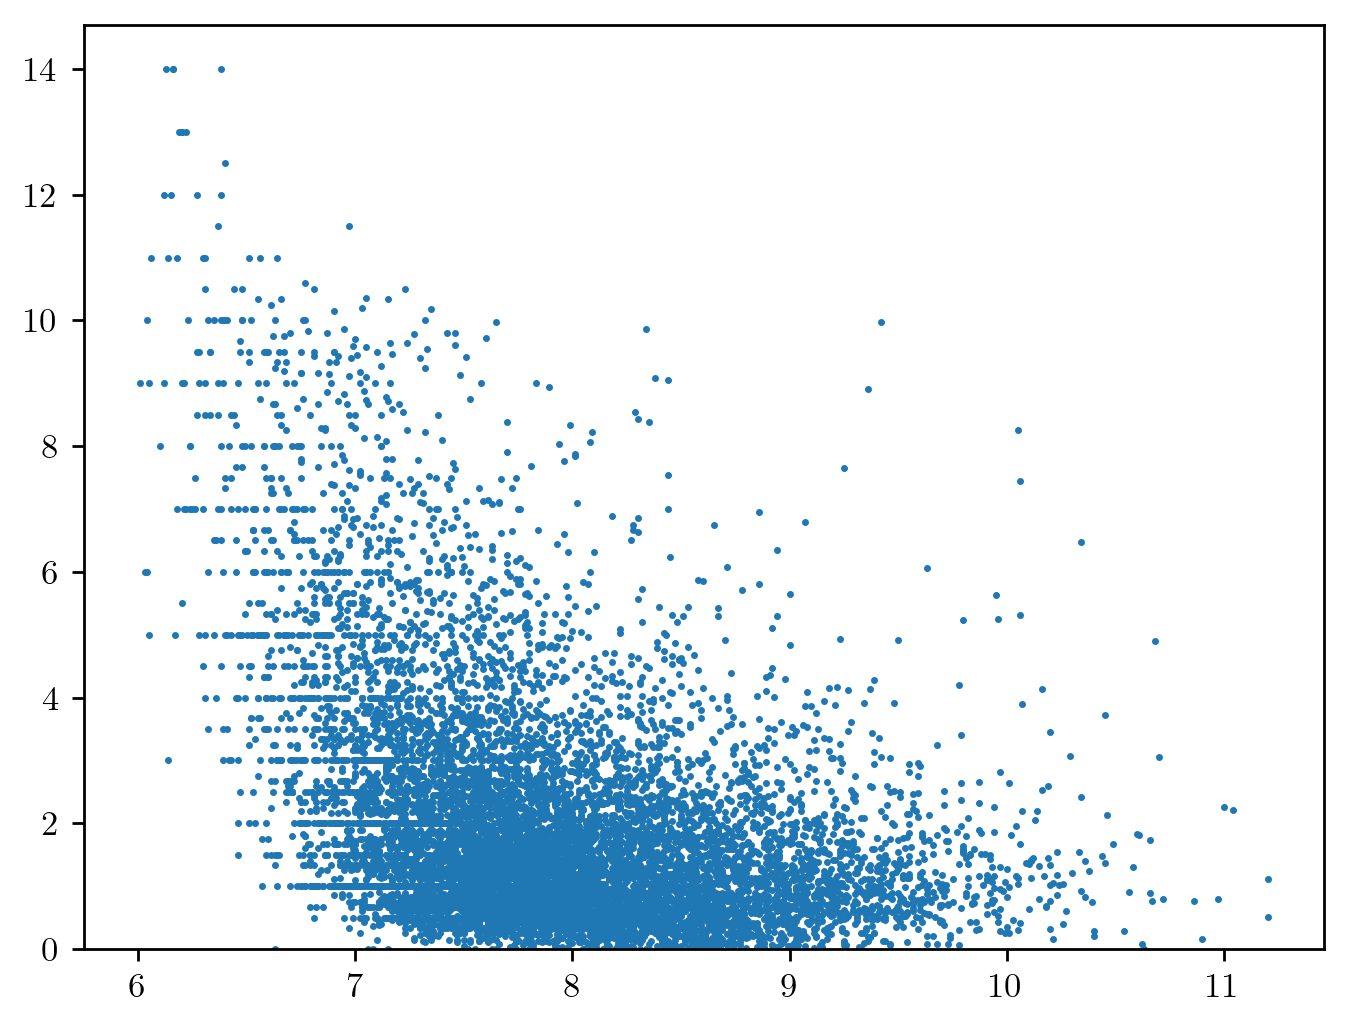

In [4]:
latex()
phot_mask = np.isin(PROSP_OBJIDS, PHOT_CATALOG['OBJIDS'][()])
Nphot_cut = (PROSP_NPHOT > 10)
snr_cut = (snr_f277w > 3) & (snr_f356w > 3) & (snr_f444w > 3)
burst = PROSP_SFR10 / PROSP_SFR100 
z_cut = (PROSP_Z > 2) & (PROSP_Z < 5)
st_mass = PROSP_ST_MASS 

mask = Nphot_cut & z_cut & snr_cut & phot_mask
plt.scatter(st_mass[mask], burst[mask], s=1)
plt.ylim(0)

In [30]:
# objids = PROSP_OBJIDS[phot_mask & Nphot_cut & z_cut & (burst < 10) & (burst > 8)]
objids = PROSP_OBJIDS[phot_mask & Nphot_cut & z_cut & (burst > 6)]
objids

array([ 32142, 200545, 221110, 218349, 129151, 156021, 144154, 145383,
       141324, 154210, 296664, 130539, 148419,  19898, 331933, 180129,
       137912, 113002, 165307,  91011,  20031, 314803, 182930, 237525,
       183825,  75230,  47607, 279674, 283749, 283688, 262644, 237351,
       211533, 145797, 302624, 233793, 152614,  47821,  81840,  40609,
        75570, 232743, 186288, 126514,  97185,  98930,  64477, 377879,
       175793,  91475, 159521, 152028, 108445,  99852,   9571, 235270,
       141646, 131853, 117910,  66656,  66571,  79051, 313274, 236826,
        44875, 259108, 115923, 124845,  31726,   9432, 149383, 110119,
       159995,  72738,  12184, 283395, 246644, 284809, 232696,  40373,
        56053, 214594, 166908,  13880,  73091, 163361, 113339,  58701,
        90220, 183309,  83099,  38843, 189234, 238831, 154554, 103713,
        34683, 144373, 122991, 283748, 190252, 239774, 151338, 118647,
       101113,  88997, 261294, 276744, 105222, 195672,  52500, 233993,
      

(array([215., 205.,  74.,  20.,  11.,   5.,   8.,   5.,   1.,   2.,   4.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.6267949 ,  2.69168535,  3.75657581,  4.82146626,  5.88635672,
         6.95124718,  8.01613763,  9.08102808, 10.14591854, 11.210809  ,
        12.27569945, 13.3405899 , 14.40548036, 15.47037082, 16.53526127,
        17.60015172, 18.66504218, 19.72993264, 20.79482309, 21.85971355,
        22.924604  ]),
 <BarContainer object of 20 artists>)

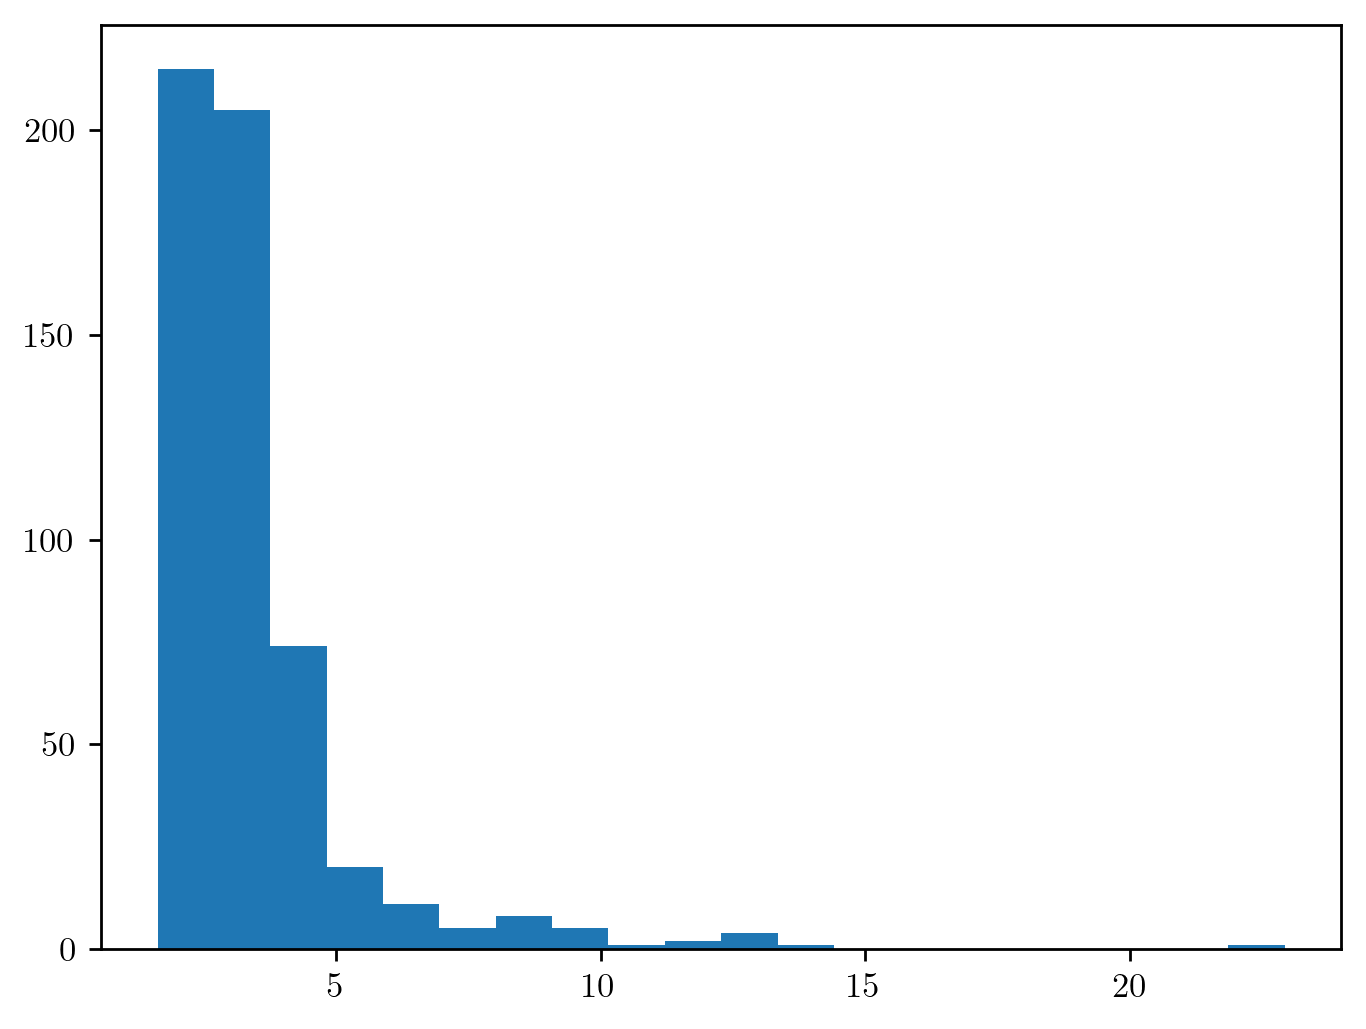

In [31]:
# objids = PROSP_OBJIDS[Nphot_cut & (burst > 10) & snr_cut & (PROSP_Z > 5)]
a = np.zeros(len(objids))
for i in range(len(objids)):
    if objids[i] in PHOT_CATALOG['OBJIDS'][()]:
        o = obj(objids[i])
        a[i] = o.a
    else:
        a[i] = 0

plt.hist(a, bins=20)

In [32]:
objids.shape

(552,)

In [35]:
objids[a > 6], objids[a > 6].shape

(array([165307, 182930, 183825, 279674, 283688, 186288, 175793, 166908,
        163361, 208368, 334848, 168867, 337534, 172091, 287972, 192346,
        168873, 322297, 333320, 378787, 178596, 198153,  79116, 191548,
        333728, 206935, 194796, 296898, 213731, 245828, 333524,  70612,
        195444,  95278, 205905, 378417, 199437], dtype='>i8'),
 (37,))

In [52]:
# 333320 looks interesting, but seems to be a string of star-forming regions part of a separate, larger object
sf_ids = np.array([165307, 183825, 175793, 283395, 208368, 191110, 168867, 172091, 168873, 198153, 79116])
sf_ids.shape

(11,)

In [53]:
sf_ids[~np.isin(sf_ids, objids[a>5])]

array([], dtype=int64)

In [54]:
for objid in sf_ids:
    o = obj(objid)
    print(o.z_a[0])

0.40999997
3.04
3.1399999
3.1899998
3.25
3.1999998
3.4499998
3.48
3.36
4.33
4.29


In [55]:
PROSP_Z[np.isin(PROSP_OBJIDS, sf_ids)]

array([3.03, 3.04, 3.09, 3.15, 3.27, 3.29, 3.56, 3.6 , 3.75, 4.15, 4.15],
      dtype='>f8')